In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline

In [8]:
def plot_neural_net(weights, layer_sizes, epoch, loss):
    fig, ax = plt.subplots(figsize=(8, 4))
    layer_positions = np.linspace(0, 1, len(layer_sizes))
    neuron_positions = {}

    # Plot neurons
    for i, (layer_size, layer_position) in enumerate(zip(layer_sizes, layer_positions)):
        for j in range(layer_size):
            neuron_position = (layer_position, 1 - (j / max(layer_sizes) + 0.5 / max(layer_sizes)))
            ax.scatter(*neuron_position, s=100, zorder=3, color='blue' if i == 0 else 'red')
            neuron_positions[(i, j)] = neuron_position

    # Plot connections
    for i, weight_matrix in enumerate(weights):
        layer_size = weight_matrix.shape[1]
        next_layer_size = weight_matrix.shape[0]

        for j in range(layer_size):
            for k in range(next_layer_size):
                weight = weight_matrix[k, j]
                line = plt.Line2D(*zip(neuron_positions[(i, j)], neuron_positions[(i + 1, k)]),
                                  linewidth=abs(weight),  # Scale thickness by weight magnitude
                                  color='green' if weight > 0 else 'red',
                                  alpha=0.6)
                ax.add_line(line)

    ax.axis('off')
    plt.title(f'Epoch {epoch+1}, Loss: {loss:.4f}')
    display(fig)
    clear_output(wait=True)
    plt.pause(0.01)
    plt.close(fig)


In [9]:
# Set the random seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Generate data points
x = torch.linspace(0, 1, steps=100).unsqueeze(1)
y_true = torch.sin(2 * np.pi * x)

# Add noise
noise = torch.randn(y_true.size()) * 0.01
y_noisy = y_true + noise


In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input layer to hidden layer
        self.fc2 = nn.Linear(10, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = Net()


In [11]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


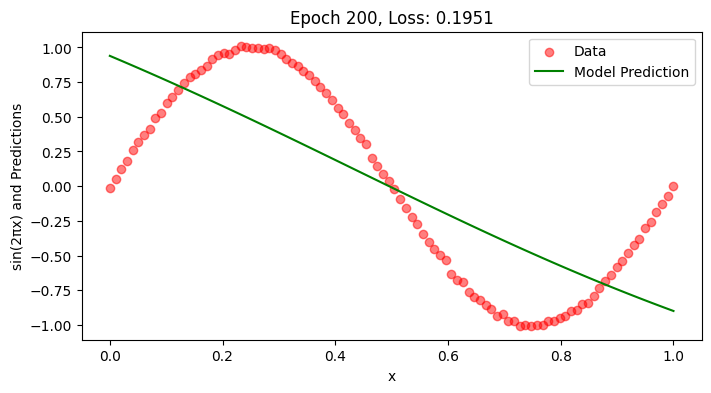

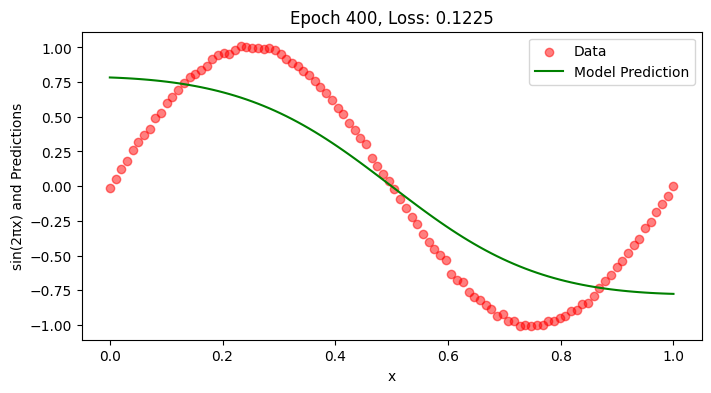

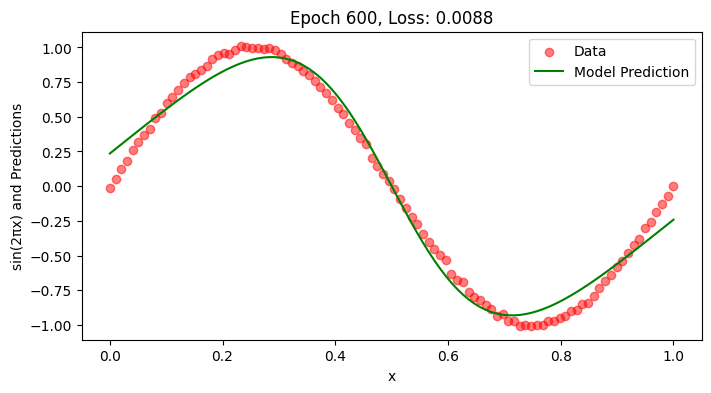

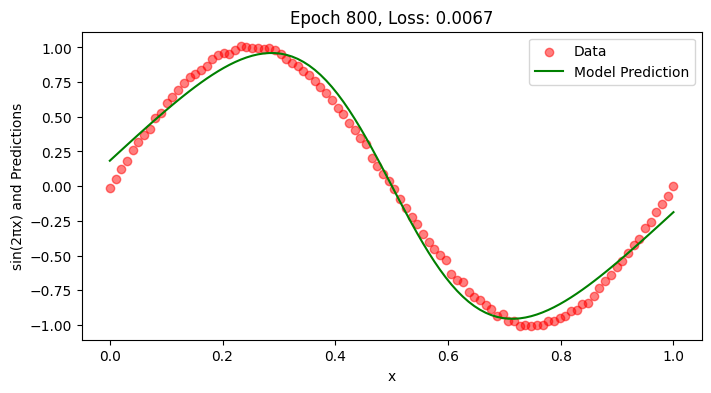

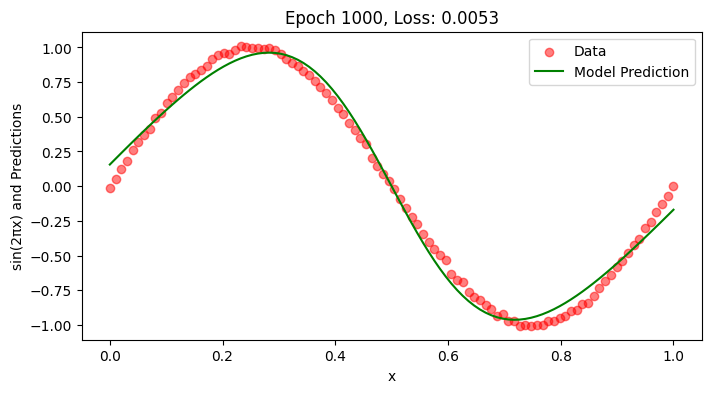

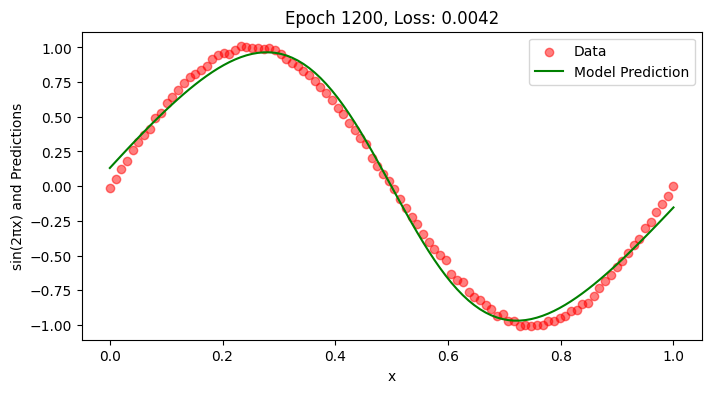

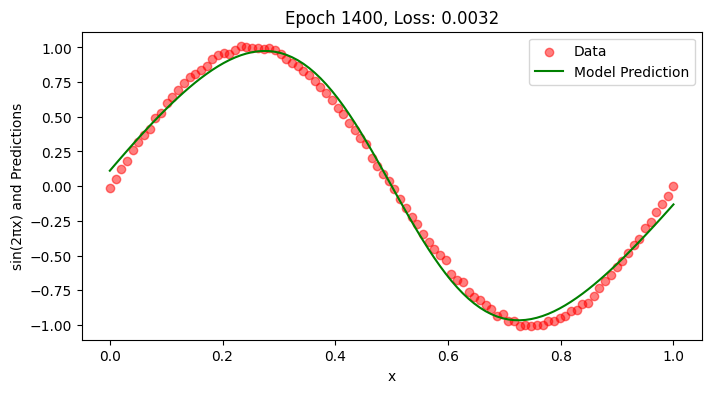

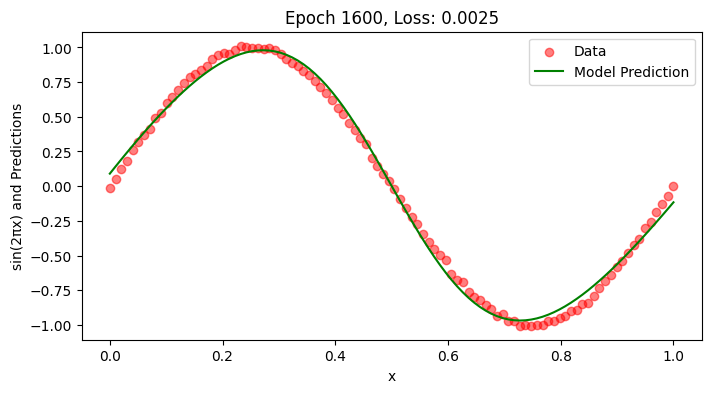

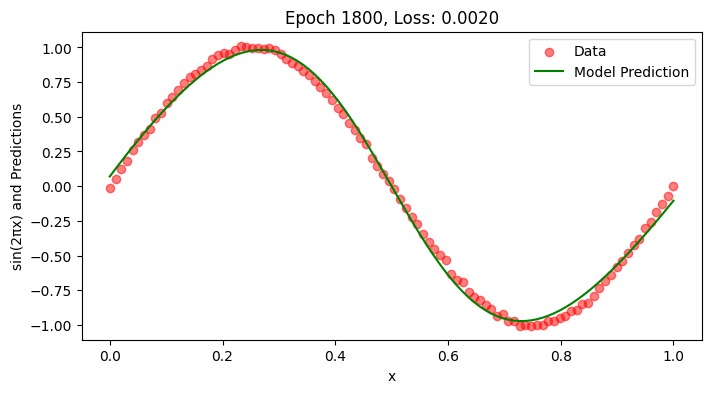

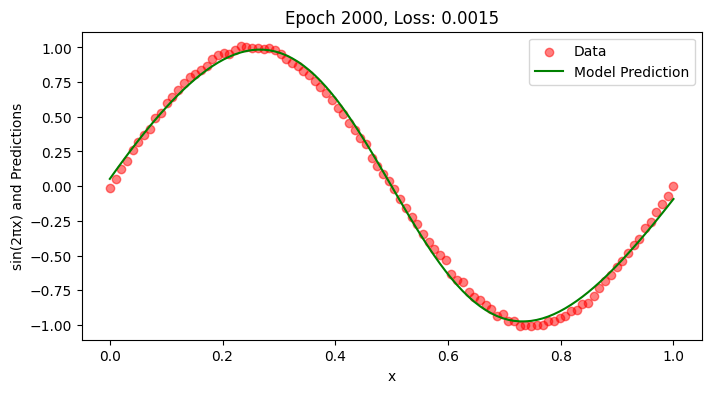

In [12]:
epochs = 2000
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for epoch in range(epochs):
    # Predict and calculate loss
    y_pred = model(x)
    loss = criterion(y_pred, y_noisy)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Plotting every 100 epochs
    if (epoch+1) % 200 == 0:
        ax.clear()
        ax.scatter(x.numpy(), y_noisy.numpy(), color='red', alpha=0.5, marker='o', label='Data')

        ax.plot(x.numpy(), y_pred.detach().numpy(), label='Model Prediction', color='green')
        ax.set_xlabel('x')
        ax.set_ylabel('sin(2πx) and Predictions')
        ax.legend()
        ax.set_title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        display(fig)
        # clear_output(wait=True)
        # plt.pause(1)
        # plot weights
        # weights = [model.fc1.weight.data.numpy(), model.fc2.weight.data.numpy()]
        # plot_neural_net(weights, [1, 10, 1], epoch, loss.item())

plt.close(fig)
